In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from prepare import prepare_data
from visualize_clf import visualize_clf
from sklearn.neighbors import KNeighborsClassifier


**Loading the dataset**

In [26]:
dataset = pd.read_csv('virus_data.csv')

In [27]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(dataset, test_size = 0.2, train_size=0.8, random_state=126)

**Preparing the data**

In [28]:
# Prepare training set according to itself
train_df_prepared = prepare_data(train_df, train_df)

# Prepare test set according to the raw training set
test_df_prepared = prepare_data(train_df, test_df)


# # Save the preprocessed DataFrames as CSV files
train_df_prepared.to_csv('train_df_prepared.csv', index=False)
test_df_prepared.to_csv('test_df_prepared.csv', index=False)
train_df.to_csv('train_df.csv', index=False)



**Part 1: Basic model selection with k-Nearest Neighbors**

**Q1**

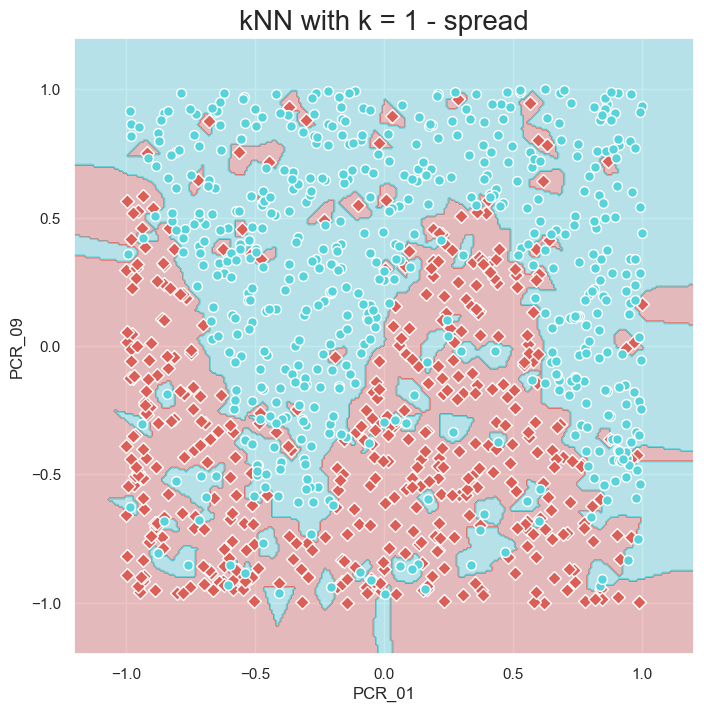

In [29]:
temp_train_df_prepared = train_df_prepared[['PCR_01', 'PCR_09']].values
temp_labels = train_df_prepared.spread.values
knn_inst_1 = KNeighborsClassifier(n_neighbors = 1)
x = temp_train_df_prepared
y = temp_labels
knn_inst_1.fit(x,y)
visualize_clf(knn_inst_1, x, y, "kNN with k = 1 - spread", "PCR_01", "PCR_09" )

**Q2**

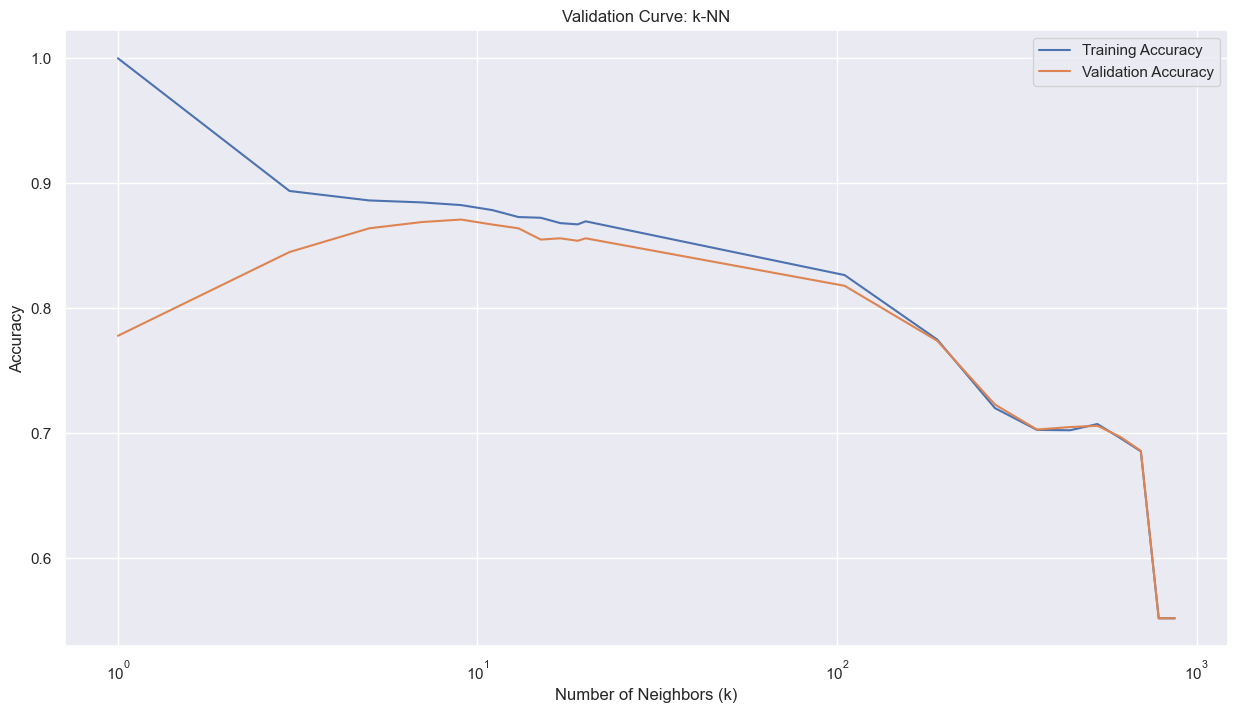

Best k value: 9
Mean training accuracy: 0.8825714285714286
Mean validation accuracy: 0.871


In [30]:
from sklearn.model_selection import cross_validate

# Define the k values to try
k_values = list(range(1, 20, 2)) + list(range(20, 871, 85))

# Lists to store mean training and validation accuracies for each k value
train_accuracies = []
val_accuracies = []

# Perform cross-validation for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, x, y, cv=8, scoring='accuracy', return_train_score=True)
    train_acc = np.mean(scores['train_score'])
    val_acc = np.mean(scores['test_score'])
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Plot the validation curve
plt.figure()
plt.semilogx(k_values, train_accuracies, label='Training Accuracy')
plt.semilogx(k_values, val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Validation Curve: k-NN')
plt.legend()
plt.grid(True)
##plt.savefig('validation_curve.png')
plt.show()

best_k = k_values[np.argmax(val_accuracies)]
best_train_accuracy = train_accuracies[np.argmax(val_accuracies)]
best_val_accuracy = np.max(val_accuracies)

print("Best k value:", best_k)
print("Mean training accuracy:", best_train_accuracy)
print("Mean validation accuracy:", best_val_accuracy)

**Q3+4**

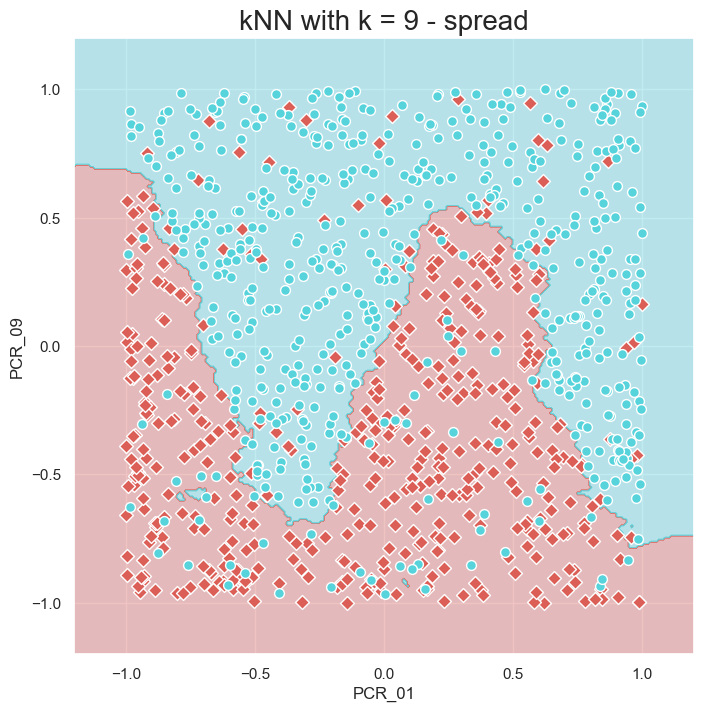

In [31]:
knn_inst_9 = KNeighborsClassifier(n_neighbors = 9)
x = temp_train_df_prepared
y = temp_labels
knn_inst_9.fit(x,y)
visualize_clf(knn_inst_9, x, y, "kNN with k = 9 - spread", "PCR_01", "PCR_09" )

**Q5**

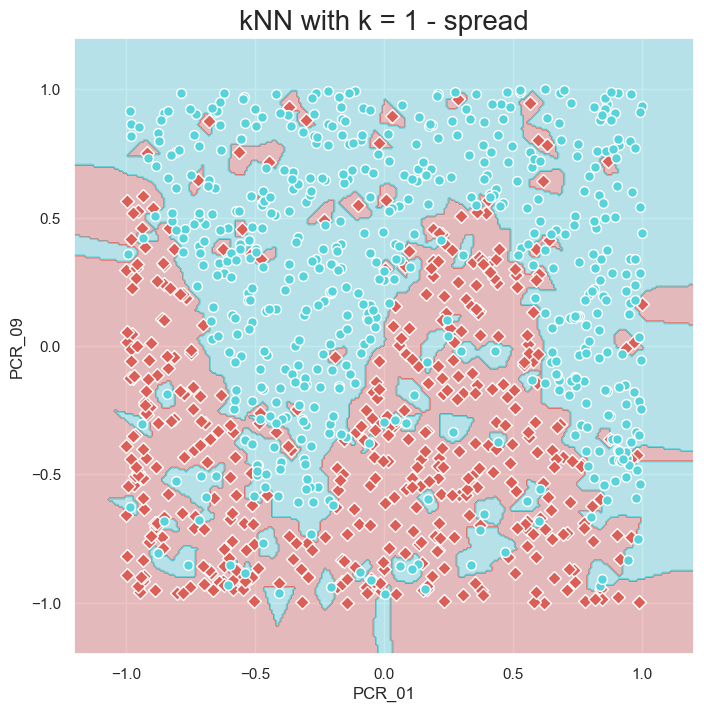

In [32]:
knn_inst_1 = KNeighborsClassifier(n_neighbors = 1)
x = temp_train_df_prepared
y = temp_labels
knn_inst_1.fit(x,y)
visualize_clf(knn_inst_1, x, y, "kNN with k = 1 - spread", "PCR_01", "PCR_09" )

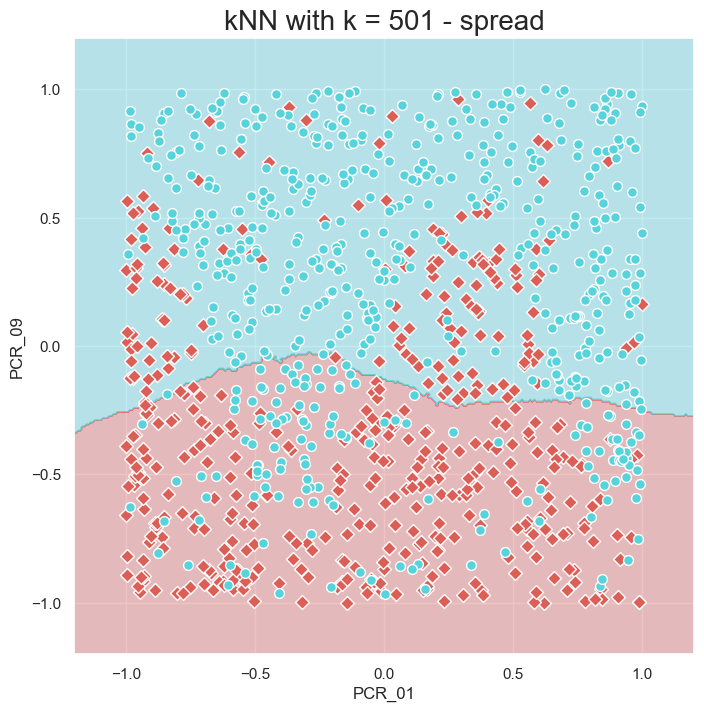

In [33]:
knn_inst_501 = KNeighborsClassifier(n_neighbors = 501)
x = temp_train_df_prepared
y = temp_labels
knn_inst_501.fit(x,y)
visualize_clf(knn_inst_501, x, y, "kNN with k = 501 - spread", "PCR_01", "PCR_09" )

**Q6**

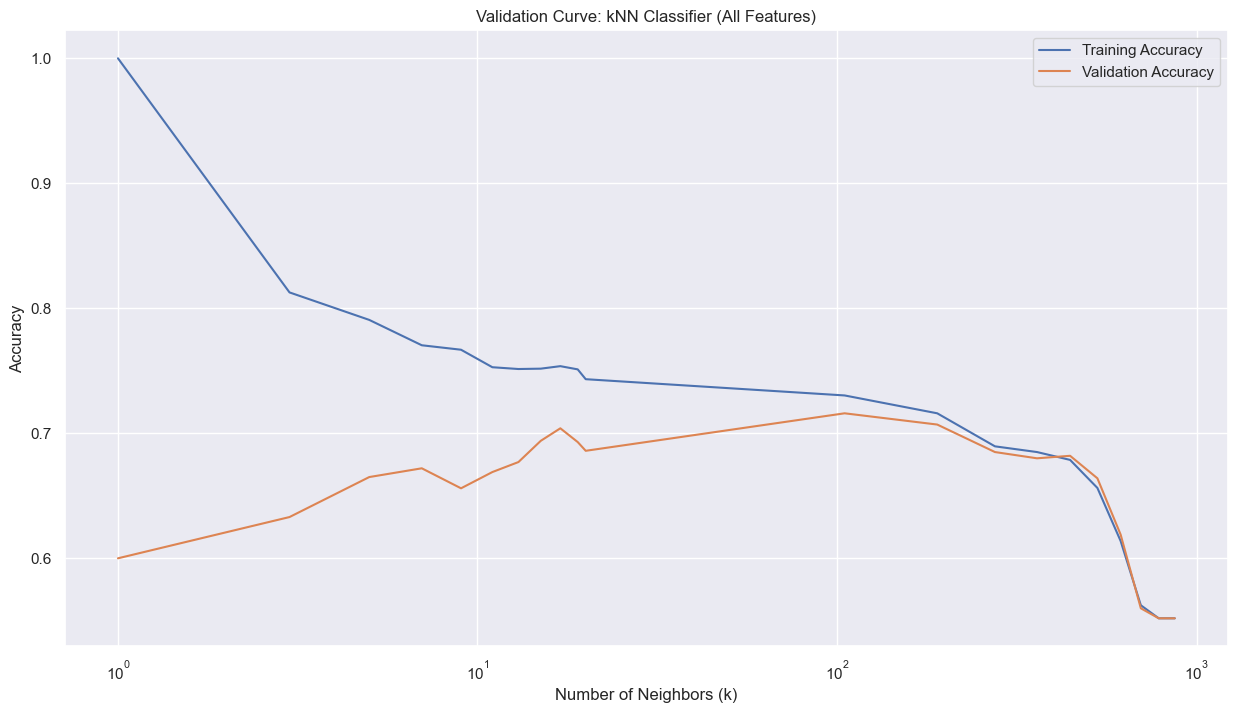

Best k value: 105
Mean Training Accuracy: 0.7302857142857142
Mean Validation Accuracy: 0.716


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder

# Extract the features and labels
X_train = train_df_prepared.drop(['spread', 'risk'], axis=1)
Y_train = train_df_prepared['spread']

# Define the range of k values
k_values = list(range(1, 20, 2)) + list(range(20, 871, 85))

# Perform cross-validation and collect the training and validation scores
train_scores = []
val_scores = []

for k in k_values:
    knn_inst = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(knn_inst, X_train, Y_train, cv=8, scoring='accuracy', return_train_score=True)
    train_scores.append(np.mean(cv_results['train_score']))
    val_scores.append(np.mean(cv_results['test_score']))

# Plot the validation curve
plt.figure()
plt.semilogx(k_values, train_scores, label='Training Accuracy')
plt.semilogx(k_values, val_scores, label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Validation Curve: kNN Classifier (All Features)")
plt.show()

# Determine the best k value
best_k_index = np.argmax(val_scores)
best_k = k_values[best_k_index]
best_train_accuracy = train_scores[best_k_index]
best_val_accuracy = val_scores[best_k_index]

# Print the results
print("Best k value:", best_k)
print("Mean Training Accuracy:", best_train_accuracy)
print("Mean Validation Accuracy:", best_val_accuracy)


**Part 2: Decision trees**

**Q7**

Training Accuracy: 0.735


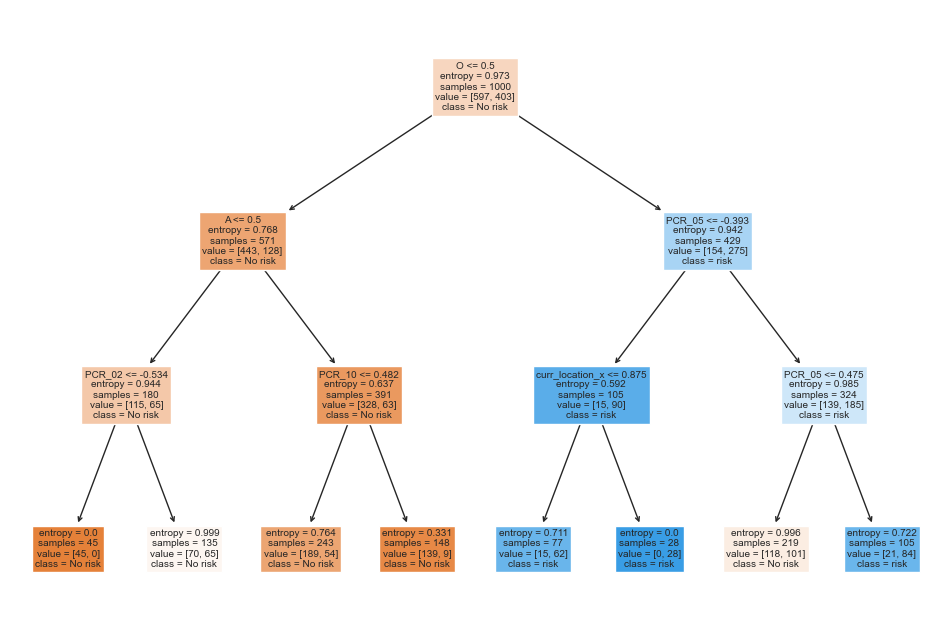

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt


X_train = train_df_prepared.drop(['spread', 'risk'], axis=1)
Y_train = train_df_prepared['risk']
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Train Decision Tree classifier
clf.fit(X_train, Y_train)

# Calculate training accuracy
training_accuracy = clf.score(X_train, Y_train)
print("Training Accuracy:", training_accuracy)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X_train.columns, class_names=['No risk', 'risk'], filled=True)
plt.show()


**Q8**

Text(0.5, 1.0, 'Mean Training Accuracy')

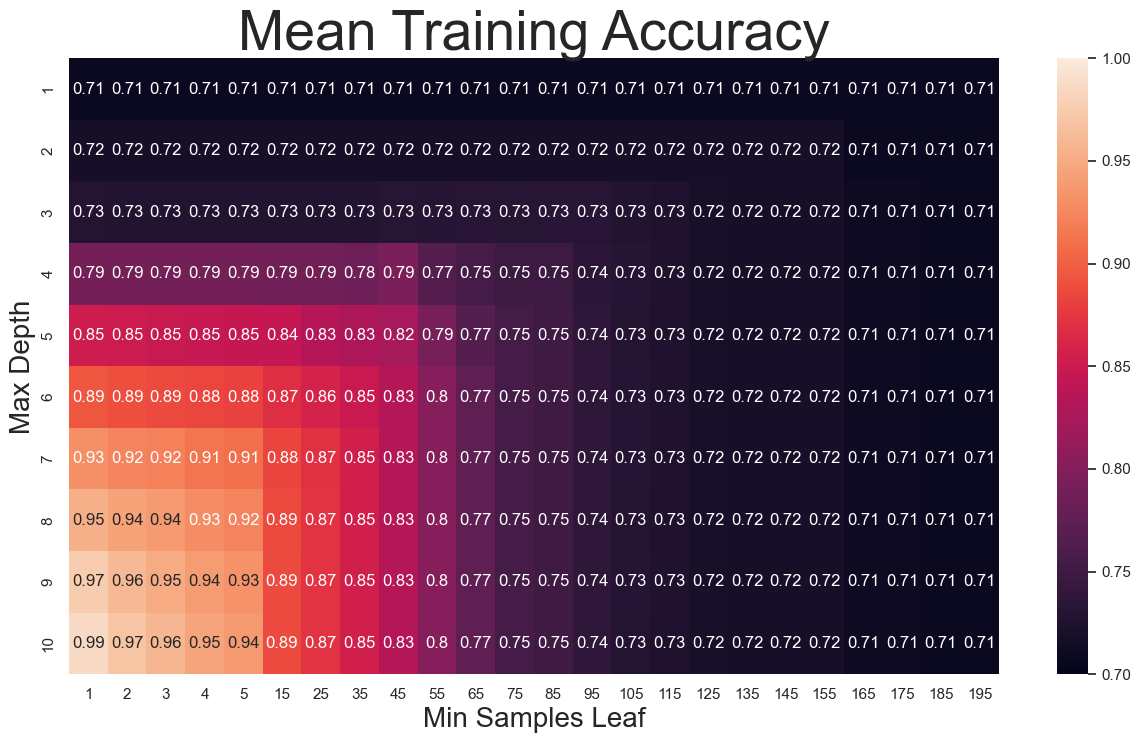

In [36]:
from sklearn.model_selection import GridSearchCV
from copy import copy


#Creating a temporary dataframe for training
temp_train = copy(train_df_prepared)
temp_train.drop('risk' , axis = 1 , inplace = True)
temp_train.drop('spread' , axis = 1 , inplace = True)
temp_labels = copy(train_df_prepared.risk.values)

max_depths = list(range(1,11,1))
min_samples = list(range(1,5,1)) + list(range(5,200,10))
params = {"criterion" : ["entropy"], "max_depth" : max_depths, "min_samples_leaf" : min_samples}
tree = DecisionTreeClassifier()

#Creating and fitting the grid search model
clf = GridSearchCV(estimator = tree, param_grid = params, cv = 8, return_train_score = True)
clf.fit(temp_train, temp_labels)

validation_means = clf.cv_results_["mean_test_score"]
training_means = clf.cv_results_["mean_train_score"]


sns.set(rc = {'figure.figsize':(15,8)})
#Plotting heatmaps
plt = sns.heatmap(training_means.reshape(len(max_depths), len(min_samples)), vmin = 0.7, vmax = 1, \
                  xticklabels = min_samples, yticklabels = max_depths, annot = True, cbar = True)
plt.set_xlabel('Min Samples Leaf', fontsize = 20)
plt.set_ylabel('Max Depth', fontsize = 20)
plt.set_title('Mean Training Accuracy', fontsize = 40)





Text(0.5, 1.0, 'Mean Validation Accuracy')

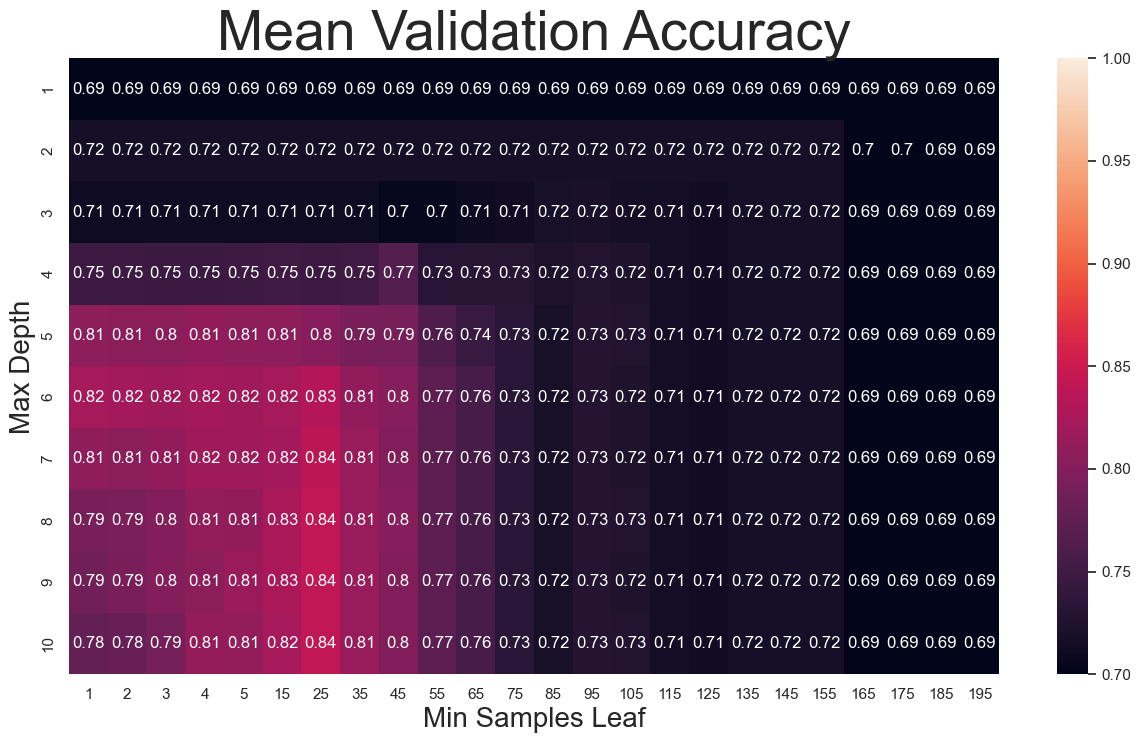

In [37]:

sns.set(rc = {'figure.figsize':(15,8)})
plt = sns.heatmap(validation_means.reshape(len(max_depths), len(min_samples)), vmin = 0.7, vmax = 1, \
                  xticklabels = min_samples, yticklabels = max_depths, annot = True, cbar = True)
plt.set_xlabel('Min Samples Leaf', fontsize = 20)
plt.set_ylabel('Max Depth', fontsize = 20)
plt.set_title('Mean Validation Accuracy', fontsize = 40)




In [38]:
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 25}


**Q9**

In [39]:
X_train = copy(train_df_prepared).drop(columns=['risk', 'spread'])
Y_train = copy(train_df_prepared).risk
X_test = copy(test_df_prepared).drop(columns=['risk',  'spread'])
Y_test = copy(test_df_prepared).risk

# Create Decision Tree classifer object with the optimal hyperparameters
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth = 8, min_samples_leaf = 25)

# Train Decision Tree Classifer
classifier = clf.fit(X=X_train, y=Y_train)

print("Test score for this model is "+ str(clf.score(X_test, Y_test)))

Test score for this model is 0.884


**Part 3: Linear SVM and the Polynomial kernel**


In [40]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class SoftSVM(BaseEstimator, ClassifierMixin):
    """
    Custom C-Support Vector Classification.
    """
    def __init__(self, C: float, lr: float = 1e-5, batch_size = 32):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param C: inverse strength of regularization. Must be strictly positive.
        :param lr: the SGD learning rate (step size)
        """
        self.C = C
        self.lr = lr
        self.batch_size = batch_size
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.random.randn(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, C: float, X, y):
        """
        Compute the SVM objective loss.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the Soft SVM objective loss (float scalar)
        """
        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))

        norm = np.linalg.norm(w)

        # TODO: complete the loss calculation
        hinge_inputs=1-hinge_inputs
        hinge_inputs=np.maximum(hinge_inputs,0)
        arr_sum=hinge_inputs.sum()
        arr_sum*=C
        loss = arr_sum+norm**2
        return loss

    @staticmethod
    def subgradient(w, b: float, C: float, X, y):
        """
        Compute the (analytical) SVM objective sub-gradient.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        # TODO: calculate the analytical sub-gradient of soft-SVM w.r.t w and b
        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))
        hinge_inputs-=1
         
        hinge_inputs=np.sign(hinge_inputs)
        
        hinge_inputs*=0.5
        hinge_inputs-=0.5
       
        
        after_hinge=np.multiply(hinge_inputs,y.reshape(-1, 1))


        before_sum_for_w=np.multiply(after_hinge,X)
        g_w=np.sum(before_sum_for_w,axis=0)
        g_w=g_w*C
        g_w=g_w+2*w

        g_b=np.sum(after_hinge)
        g_b*=C
      

        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 2000, keep_losses: bool = True):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses:
        :return: the training losses and accuracies during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        losses = []
        accuracies = []

        if keep_losses:
            losses.append(self.loss(self.w, self.b, self.C, X, y))
            accuracies.append(self.score(X, y))

        permutation = np.random.permutation(len(y))
        X = X[permutation, :]
        y = y[permutation]
        
        # Iterate over batches
        for iter in range(0, max_iter):
            start_idx = (iter * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx:end_idx, :]
            batch_y = y[start_idx:end_idx]

            # TODO: Compute the (sub)gradient of the current *batch*
            g_w, g_b = self.subgradient(self.w,self.b,self.C,batch_X,batch_y)


            # Perform a (sub)gradient step
            # TODO: update the learned parameters correctly
            self.w = self.w-self.lr *g_w
            self.b = self.b-self.lr *g_b

            if keep_losses:
                losses.append(self.loss(self.w, self.b, self.C, X, y))
                accuracies.append(self.score(X, y))

        return losses, accuracies

    def fit(self, X, y, max_iter: int = 2000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Perform classification on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted class labels for samples in X; array of shape (n_samples,)
                 NOTE: the labels must be either +1 or -1
        """
        # TODO: compute the predicted labels (+1 or -1)
        y_pred = []
        for x in X:
          value = (x.dot(self.w) + self.b)
          if value>=0:
            y_pred.append(1)
          else:
            y_pred.append(-1)
        y_pred=np.array(y_pred)
        return y_pred


In [41]:
import matplotlib.pyplot as plt
def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b



def compare_gradients(X, y, deltas, C=1, REPEATS=100, figsize=(10, 6)):
    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))

    plt.figure(figsize=figsize)
    plt.title('Residuals of analytical and numerical gradients', fontsize=22)
    plt.plot(deltas, residual_means, linewidth=3)      
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\delta$', fontsize=18)
    plt.ylabel(r'$\left\Vert \nabla_{w}p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)

    plt.grid(alpha=0.5)
    plt.show()

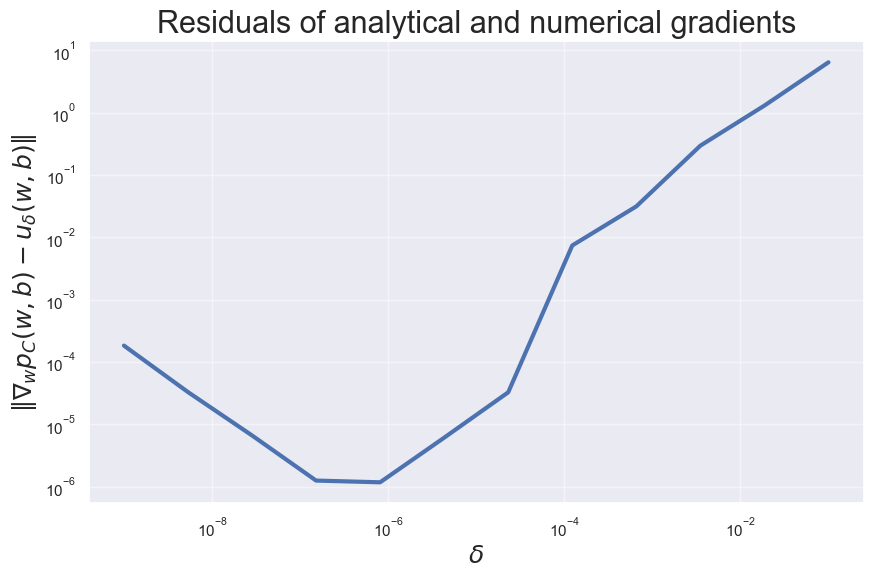

In [42]:
X_train=train_df_prepared[['PCR_01','PCR_09']].copy()
X_train=X_train.to_numpy()
Y_train=train_df_prepared['spread'].to_numpy()
compare_gradients(X_train, Y_train, deltas=np.logspace(-9, -1, 12))

**Q11**

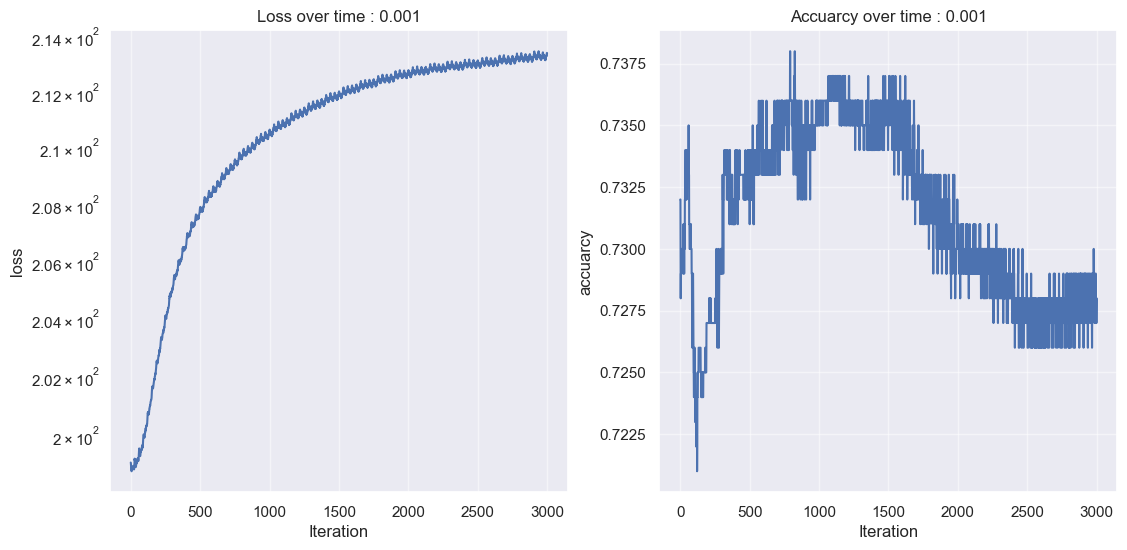

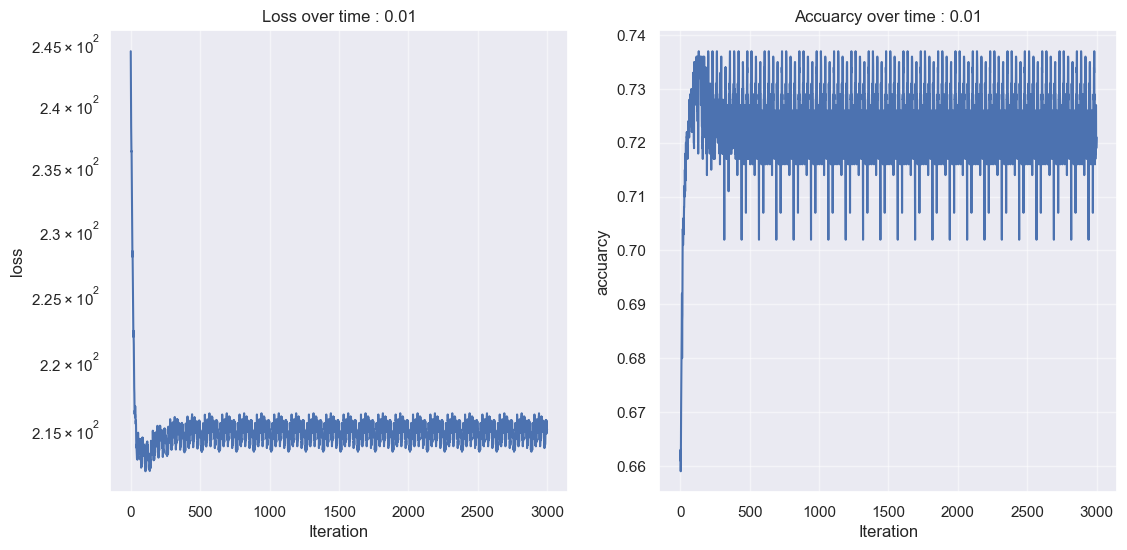

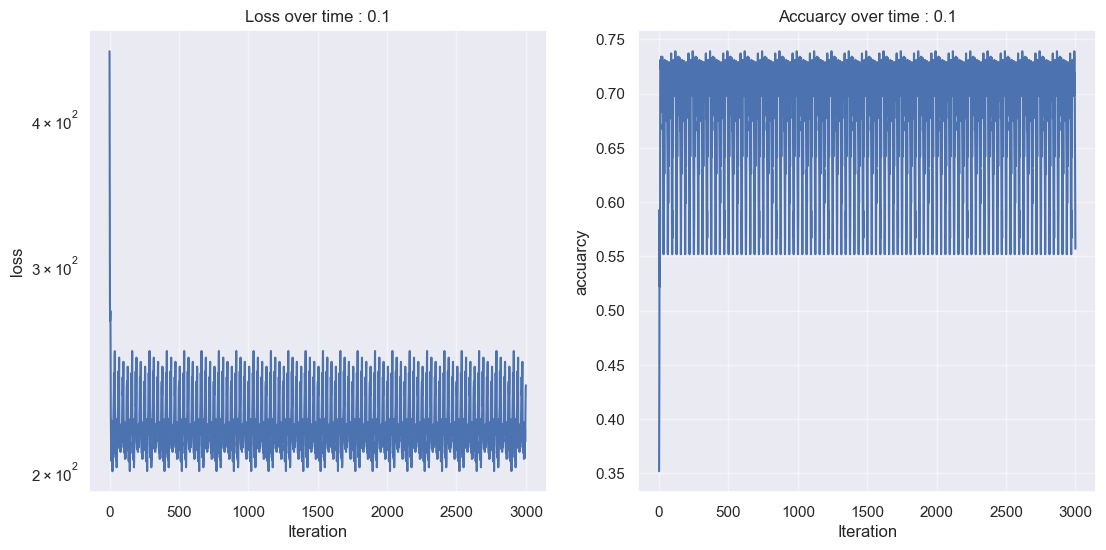

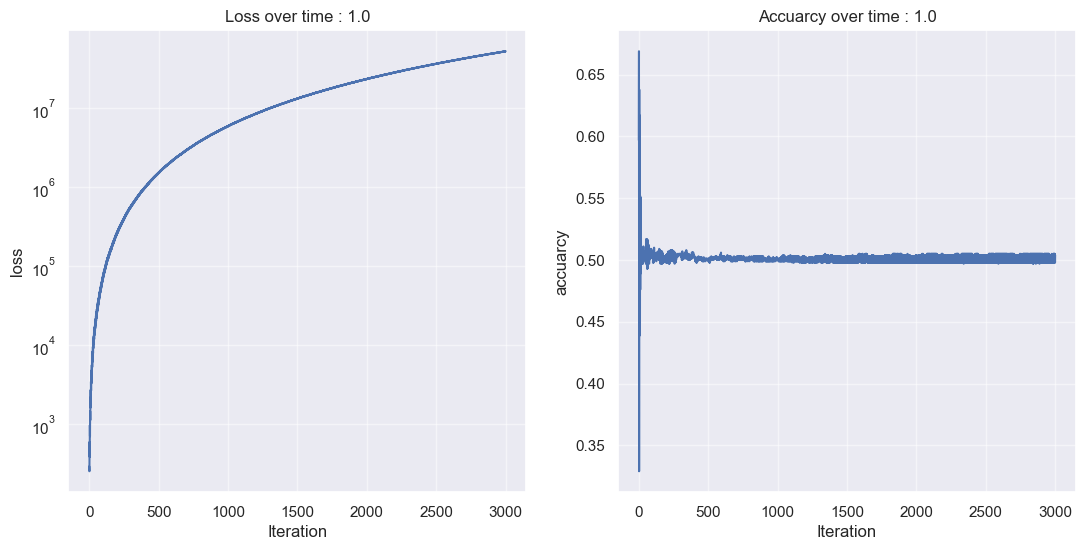

In [63]:
X_train=train_df_prepared[['PCR_01','PCR_09']].copy()
X_train=X_train.to_numpy()
Y_train=train_df_prepared['spread'].to_numpy()
#A
for i in np.logspace(-3, 0, 4):
  clf = SoftSVM(C=0.3, lr=i)
  losses, accuracies = clf.fit_with_logs(X_train, Y_train, max_iter=3000)
  plt.figure(figsize=(13, 6))
  plt.subplot(121), plt.grid(alpha=0.5), plt.title ("Loss over time : " +str(i))
  plt.semilogy(losses), plt.xlabel("Iteration"), plt.ylabel("loss")
  plt.subplot(122), plt.grid(alpha=0.5), plt.title ("Accuarcy over time : " + str(i))
  plt.plot(accuracies), plt.xlabel("Iteration"), plt.ylabel("accuarcy")

Best learning rate: 0.01
Best accuracy: 0.735
Minimal loss: 212.87618442028938
Maximal training accuracy: 75
Minimal training loss: 2125
Maximal accuracy and minimal loss are not attained at the same step.


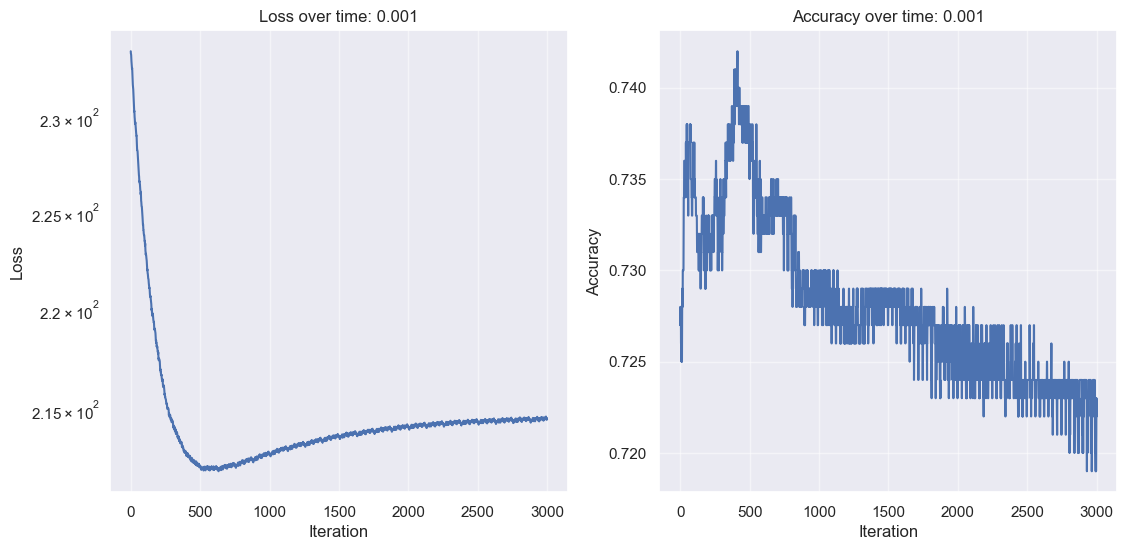

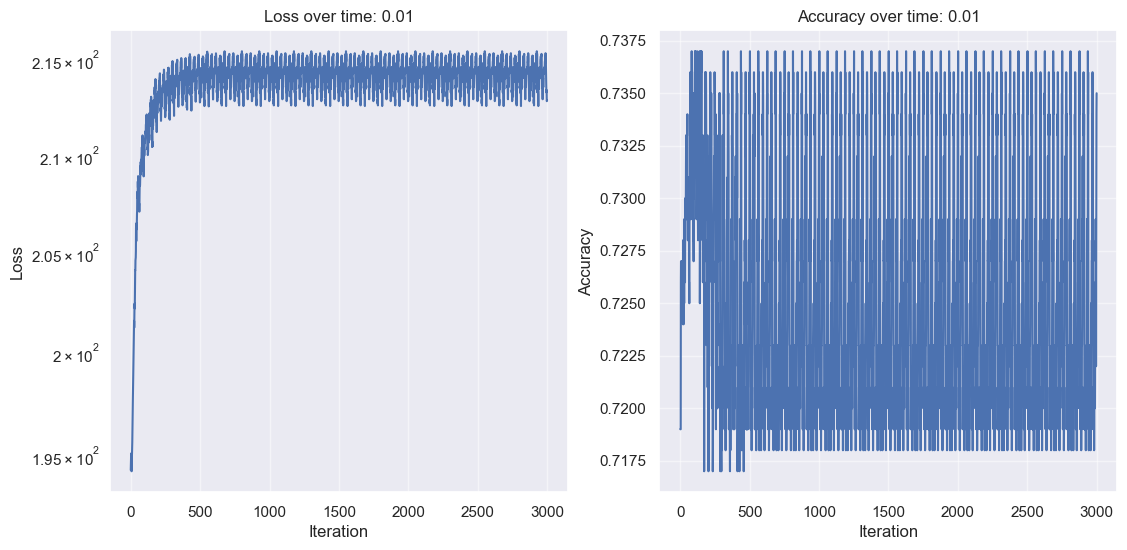

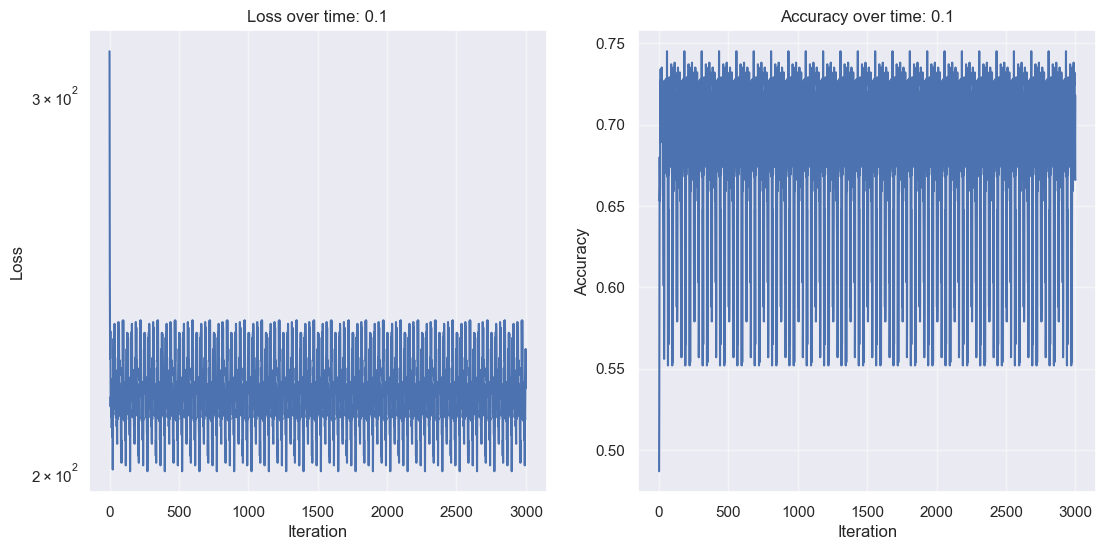

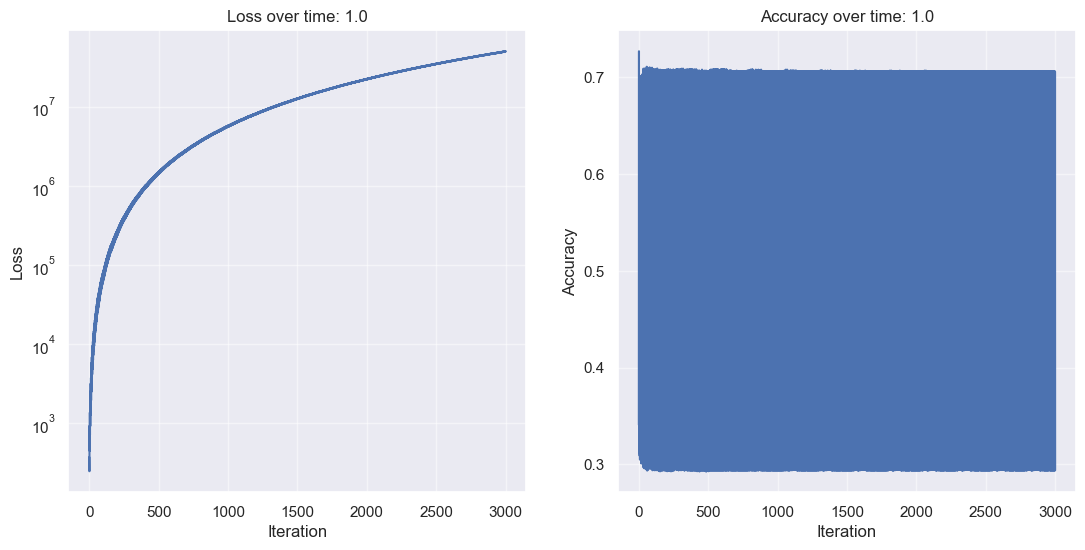

In [83]:
best_lr = None
best_accuracy = 0
minimal_loss = float('inf')
max_accuracy_step = 0
min_loss_step = 0
X_train=train_df_prepared[['PCR_01','PCR_09']].copy()
X_train=X_train.to_numpy()
Y_train=train_df_prepared['spread'].to_numpy()
for i in np.logspace(-3, 0, 4):
  clf = SoftSVM(C=0.3, lr=i)
  losses, accuracies = clf.fit_with_logs(X_train, Y_train, max_iter=3000)
  
  # Calculate accuracy and loss
  current_accuracy = accuracies[-1]
  current_loss = losses[-1]
  
  # Update best_lr if current combination is better
  if current_accuracy > best_accuracy and current_loss < minimal_loss:
    best_accuracy = current_accuracy
    minimal_loss = current_loss
    best_lr = i
    max_accuracy_step = accuracies.index(best_accuracy)
    min_loss_step = losses.index(minimal_loss)
  
  # Plot the results
  plt.figure(figsize=(13, 6))
  plt.subplot(121), plt.grid(alpha=0.5), plt.title("Loss over time: " + str(i))
  plt.semilogy(losses), plt.xlabel("Iteration"), plt.ylabel("Loss")
  plt.subplot(122), plt.grid(alpha=0.5), plt.title("Accuracy over time: " + str(i))
  plt.plot(accuracies), plt.xlabel("Iteration"), plt.ylabel("Accuracy")

# Print the best learning rate and corresponding accuracy and loss
print("Best learning rate:", best_lr)
print("Best accuracy:", best_accuracy)
print("Minimal loss:", minimal_loss)

# Print maximal training accuracy and minimal training loss achieved
print("Maximal training accuracy:", max_accuracy_step)
print("Minimal training loss:", min_loss_step)

# Check if maximal accuracy and minimal loss are attained at the same step
if max_accuracy_step == min_loss_step:
    print("Maximal accuracy and minimal loss attained at the same step.")
else:
    print("Maximal accuracy and minimal loss are not attained at the same step.")


0.724


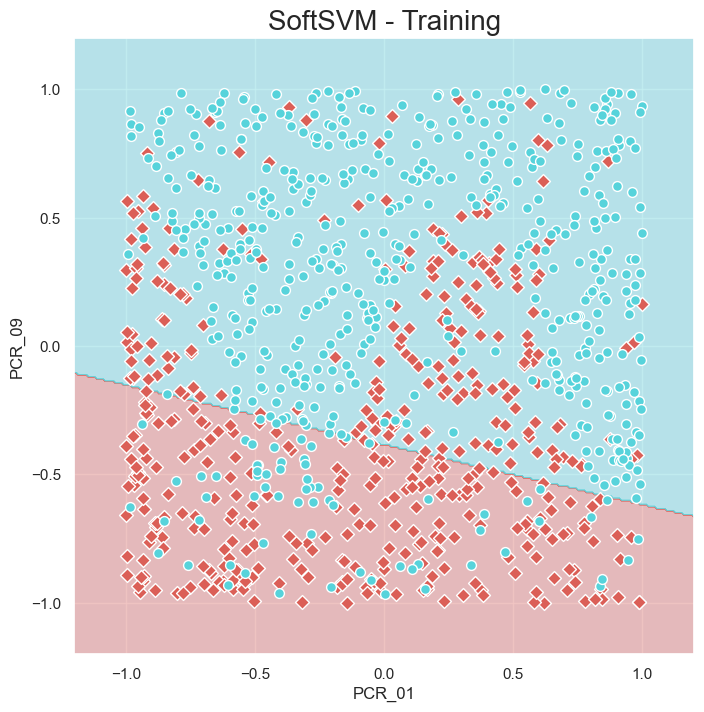

In [84]:
#B
clf = SoftSVM(C=0.3, lr=0.001)
losses, accuracies = clf.fit_with_logs(X_train, Y_train, max_iter=3000)
print(clf.score(X_train , Y_train))
visualize_clf(clf, X_train, Y_train, 'SoftSVM - Training', 'PCR_01','PCR_09' )

In [85]:
#C
print(np.max(accuracies))
print(np.argmax(accuracies))
print(np.min(losses))
print(np.argmin(losses))

0.724
2443
215.8591920143909
2973
